In [1]:
import scipy.io
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from matplotlib import cm
import imageio
import math
import csv

In [2]:
#mat = scipy.io.loadmat('D:\Documents\Year 3\FEEG3003 - IP\Airfoil Data\A0PIVairfoil.mat')
#mat = scipy.io.loadmat('D:\Documents\Year 3\FEEG3003 - IP\Airfoil Data\A2PIVu.mat')
#mat = scipy.io.loadmat('D:\Documents\Year 3\FEEG3003 - IP\Airfoil Data\A5PIVboth.mat')
mat = scipy.io.loadmat('D:\Documents\Year 3\FEEG3003 - IP\Airfoil Data\A10PIVairfoilall.mat')
data = list(mat.items())

u = data[8]
u_mean = data[9]
x = data[10]
y = data[11]
ts = data[3][1][0][0] # time step between snapshots

In [3]:
samples = len(u[1])             # number of snapshots in input data

h = len(u[1][1][1])             # height of matrix = y
l = len(u[1][1])                # length of matrix = x
h_trunc = 40                    # y truncation for input data
l_trunc = 140                   # x truncation for input data
t_trunc = samples                 # number of time snapshots for SVD

print(samples, h, l)

6998 40 150


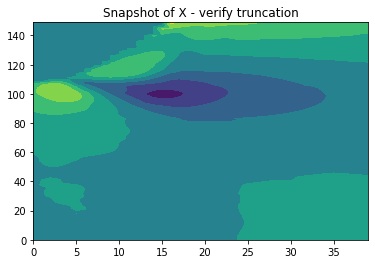

In [4]:
fig, ax = plt.subplots()
cs = ax.contourf(u_mean[1][0])
ax.set_title('Snapshot of X - verify truncation')
plt.plot()
fig.canvas.draw()  

In [4]:
#print(x[1]) # [name "x"] __ [186 x coord arrays] __ [66 identical values]
xs = []
for i in range(0, l_trunc):
    xs.append(x[1][i][1])
print(len(xs))
ys = y[1][1][0:(h_trunc)]
print(len(ys))
print(len(xs)*len(ys))

140
40
5600


(6998, 40, 140)


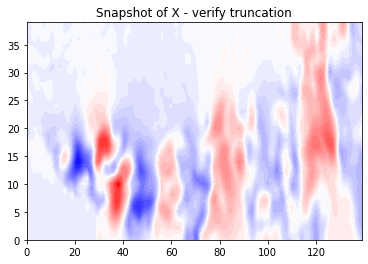

In [5]:
X = np.empty([samples,h_trunc,l_trunc])
print(np.shape(X))
for i in range(0,samples):
    X_man = np.rot90(u[1][i]-u_mean[1][0],3)
    X_man = np.delete(X_man, np.s_[h_trunc::], 0) # from top left, slice row 0:h. Parameter of 0 in np.delete defines rows
    X_man = np.delete(X_man, np.s_[0:l-l_trunc], 1) # from top left, slice column 0:l. Parameter of 1 in np.delete defines columns
    X[i] = X_man

fig, ax = plt.subplots()
plt.set_cmap("bwr")
cs = ax.contourf(X_man, 40)
ax.set_title('Snapshot of X - verify truncation')
plt.plot()
fig.canvas.draw()    

In [6]:
X = np.reshape(X, (samples,l_trunc*h_trunc))      # reshape X to contain all velocity points in second matrix dimension

X_trunc = np.transpose(np.delete(X, np.s_[t_trunc::], 0))   # truncate time resolution
print(np.shape(X_trunc))

(5600, 6998)


In [7]:
U,S,VT = linalg.svd(X_trunc,full_matrices=False) 

print(np.shape(U))
print(np.shape(S))
print(np.shape(VT))

np.save('A5PIVboth_U', U)
np.save('A5PIVboth_S', S)
np.save('A5PIVboth_VT', VT)

(5600, 5600)
(5600,)
(5600, 6998)


([<matplotlib.axis.XTick at 0x264fb6d30d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

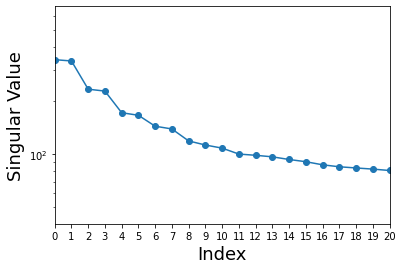

In [8]:
plt.semilogy(S,'-o')
plt.xlim(0,20)
plt.ylim(S[20]*0.5,S[0]*2)
plt.ylabel('Singular Value', fontsize=18)
plt.xlabel('Index', fontsize=18);
plt.xticks(np.arange(0,21))

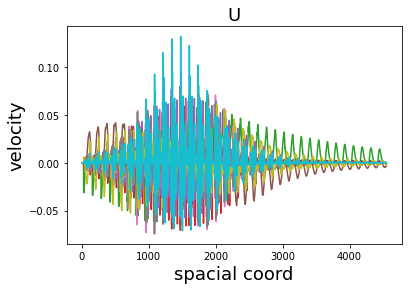

In [9]:
for i in range(0,10):
    plt.plot(U[:,i])
plt.xlabel('spacial coord', fontsize=18)
plt.ylabel('velocity', fontsize=18)
plt.title('U', fontsize=18);

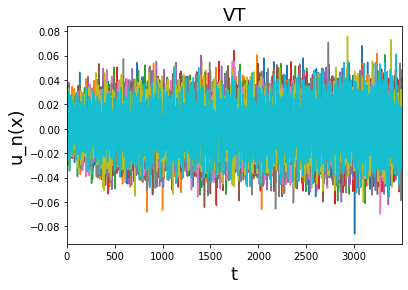

In [10]:
for i in range(0,10):
    plt.plot(VT[:,i])
plt.xlim(0,samples)
plt.xlabel('t', fontsize=18)
plt.ylabel('u_n(x)', fontsize=18)
plt.title('VT', fontsize=18);

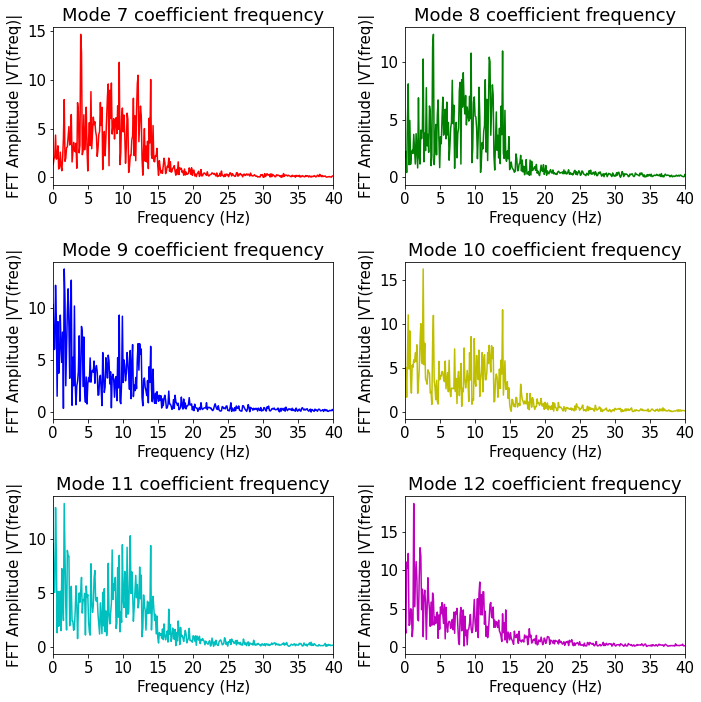

In [11]:
# Source: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html
from numpy.fft import fft, ifft # using fast fourier transform to find the discrete frequencies of the signal

#mode_no = [0,1,2,3,4,5]
mode_no = [6,7,8,9,10,11]

Freq0 = np.flip(fft(VT[mode_no[0],:]))
Freq1 = np.flip(fft(VT[mode_no[1],:]))
Freq2 = np.flip(fft(VT[mode_no[2],:]))
Freq3 = np.flip(fft(VT[mode_no[3],:]))
Freq4 = np.flip(fft(VT[mode_no[4],:]))
Freq5 = np.flip(fft(VT[mode_no[5],:]))
N = len(Freq0)
n = np.arange(N/2)

sr = 1/ts # sampling rate, Hz
t = np.arange(0,N/sr,ts)

# Get the one-sided specturm
n_oneside = int(N/2)
# get the one side frequency
f_oneside = n*2*np.pi*sr/(2*n_oneside)

xmax = 40 #sr

fig, ((plt0, plt1),(plt2, plt3),(plt4, plt5)) = plt.subplots(3, 2, figsize = (10,10))
fig.subplots_adjust(hspace = 0.3)

plt.rc('font', size=15) #controls default text size

plt0.plot(f_oneside, np.abs(Freq0[:n_oneside]), 'r')
plt1.plot(f_oneside, np.abs(Freq1[:n_oneside]), 'g')
plt2.plot(f_oneside, np.abs(Freq2[:n_oneside]), 'b')
plt3.plot(f_oneside, np.abs(Freq3[:n_oneside]), 'y')
plt4.plot(f_oneside, np.abs(Freq4[:n_oneside]), 'c')
plt5.plot(f_oneside, np.abs(Freq5[:n_oneside]), 'm')
plt0.set_xticks([0,xmax/8,xmax/4,3*xmax/8,xmax/2,5*xmax/8,3*xmax/4,7*xmax/8,xmax])
plt1.set_xticks([0,xmax/8,xmax/4,3*xmax/8,xmax/2,5*xmax/8,3*xmax/4,7*xmax/8,xmax])
plt2.set_xticks([0,xmax/8,xmax/4,3*xmax/8,xmax/2,5*xmax/8,3*xmax/4,7*xmax/8,xmax])
plt3.set_xticks([0,xmax/8,xmax/4,3*xmax/8,xmax/2,5*xmax/8,3*xmax/4,7*xmax/8,xmax])
plt4.set_xticks([0,xmax/8,xmax/4,3*xmax/8,xmax/2,5*xmax/8,3*xmax/4,7*xmax/8,xmax])
plt5.set_xticks([0,xmax/8,xmax/4,3*xmax/8,xmax/2,5*xmax/8,3*xmax/4,7*xmax/8,xmax])
plt0.set_xlim(0, xmax)
plt1.set_xlim(0, xmax)
plt2.set_xlim(0, xmax)
plt3.set_xlim(0, xmax)
plt4.set_xlim(0, xmax)
plt5.set_xlim(0, xmax)

plt0.set_xlabel('Frequency (Hz)')
plt0.set_ylabel('FFT Amplitude |VT(freq)|')
plt1.set_xlabel('Frequency (Hz)')
plt1.set_ylabel('FFT Amplitude |VT(freq)|')
plt2.set_xlabel('Frequency (Hz)')
plt2.set_ylabel('FFT Amplitude |VT(freq)|')
plt3.set_xlabel('Frequency (Hz)')
plt3.set_ylabel('FFT Amplitude |VT(freq)|')
plt4.set_xlabel('Frequency (Hz)')
plt4.set_ylabel('FFT Amplitude |VT(freq)|')
plt5.set_xlabel('Frequency (Hz)')
plt5.set_ylabel('FFT Amplitude |VT(freq)|')

plt0.set_title('Mode ' + str(mode_no[0]+1) + ' coefficient frequency')
plt1.set_title('Mode ' + str(mode_no[1]+1) + ' coefficient frequency')
plt2.set_title('Mode ' + str(mode_no[2]+1) + ' coefficient frequency')
plt3.set_title('Mode ' + str(mode_no[3]+1) + ' coefficient frequency')
plt4.set_title('Mode ' + str(mode_no[4]+1) + ' coefficient frequency')
plt5.set_title('Mode ' + str(mode_no[5]+1) + ' coefficient frequency')

plt.tight_layout()
plt.show()

In [ ]:
print(U[:,0])

(5600, 40, 140)


[]

<Figure size 432x288 with 0 Axes>

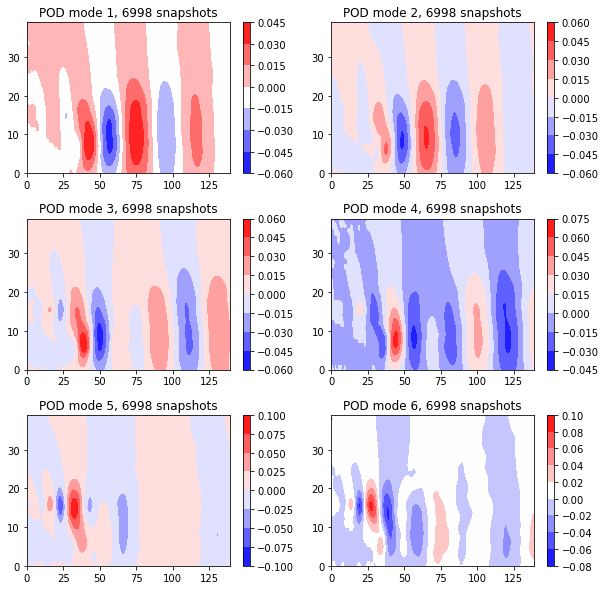

In [9]:
POD = np.empty([len(U[1]),h_trunc,l_trunc])
POD_total = np.empty([h_trunc,l_trunc])
print(np.shape(POD))

for i in range(0,len(U[1])):
    POD[i] = np.reshape(U[:,i], (h_trunc,l_trunc))
    
mode_no = [0,1,2,3,4,5]
#mode_no = [6,7,8,9,10,11]
plt.set_cmap("bwr")
plt.rc('font', size=10) #controls default text size

fig, ((ax0, ax1),(ax2, ax3),(ax4, ax5)) = plt.subplots(3, 2, figsize = (10,10))
fig.subplots_adjust(hspace = 0.3)

cs0 = ax0.contourf(POD[mode_no[0]])
cs1 = ax1.contourf(POD[mode_no[1]])
cs2 = ax2.contourf(POD[mode_no[2]])
cs3 = ax3.contourf(POD[mode_no[3]])
cs4 = ax4.contourf(POD[mode_no[4]])
cs5 = ax5.contourf(POD[mode_no[5]])

ax0.set_title('POD mode ' + str(mode_no[0]+1) + ', ' + str(t_trunc) + ' snapshots')
ax1.set_title('POD mode ' + str(mode_no[1]+1) + ', ' + str(t_trunc) + ' snapshots')
ax2.set_title('POD mode ' + str(mode_no[2]+1) + ', ' + str(t_trunc) + ' snapshots')
ax3.set_title('POD mode ' + str(mode_no[3]+1) + ', ' + str(t_trunc) + ' snapshots')
ax4.set_title('POD mode ' + str(mode_no[4]+1) + ', ' + str(t_trunc) + ' snapshots')
ax5.set_title('POD mode ' + str(mode_no[5]+1) + ', ' + str(t_trunc) + ' snapshots')

#plt.pcolor(POD[0], vmin=-1, vmax=1)

fig.colorbar(cs0, ax=ax0)
fig.colorbar(cs1, ax=ax1)
fig.colorbar(cs2, ax=ax2)
fig.colorbar(cs3, ax=ax3)
fig.colorbar(cs4, ax=ax4)
fig.colorbar(cs5, ax=ax5)
plt.plot()

In [11]:
filename = "pod_10_10.csv"
with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for i in range(0,10):
        pod_data = np.reshape(POD[i],(h_trunc*l_trunc))
        res = [float(i) for i in pod_data]
        csvwriter.writerow(res)